In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

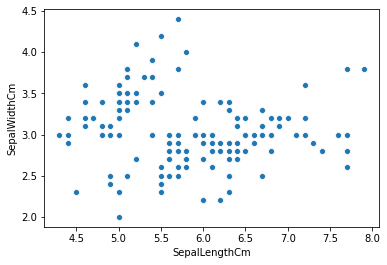

In [8]:
sns.scatterplot(x=df.SepalLengthCm,y=df.SepalWidthCm)

In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


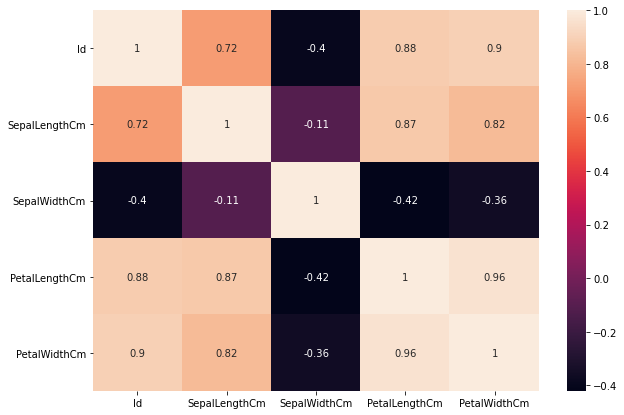

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True)

C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


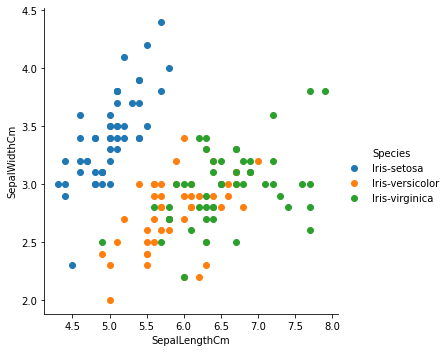

In [11]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

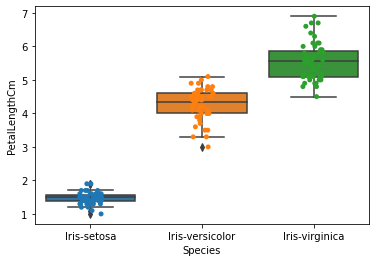

In [12]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


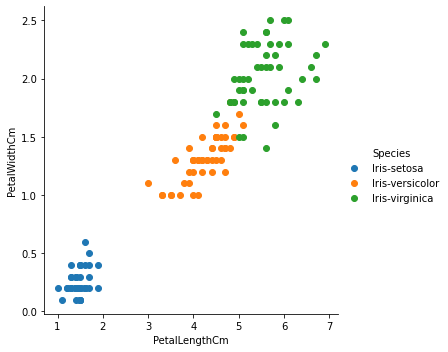

In [13]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

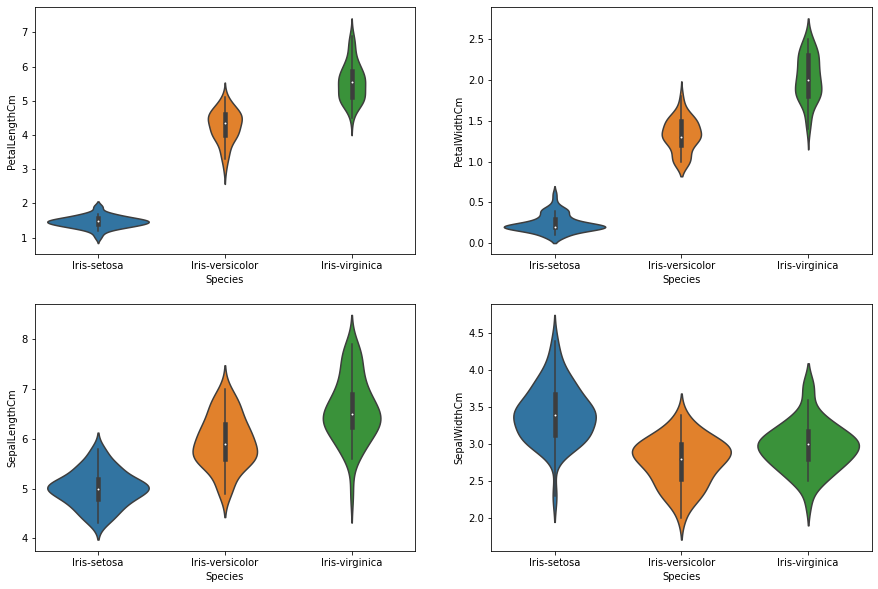

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

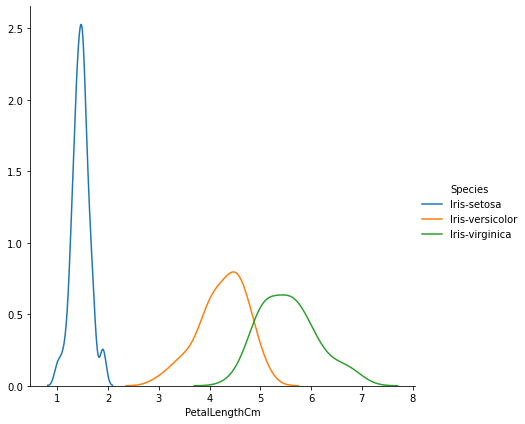

In [15]:
#Seaborn plot useful for looking at univariate relations is the kdeplot,
sns.FacetGrid(df, hue="Species", size=6) .map(sns.kdeplot, "PetalLengthCm").add_legend()

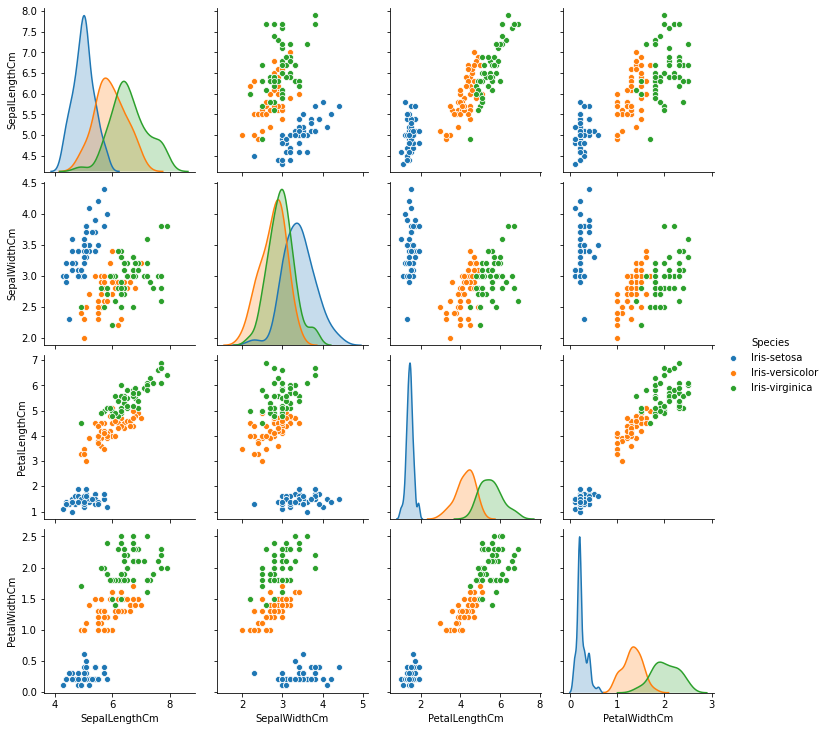

In [16]:
sns.pairplot(df.drop('Id',axis=1),hue='Species')

### The problem is a classification problem.We will be using the classification algorithms to build a model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['Species'],axis = 1)
y = df.Species.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Logitstic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Lr = LogisticRegression()
Lr.fit(X_train,y_train)
pred_Lr = Lr.predict(X_test)
print('The accuracy of the LR is:',metrics.accuracy_score(pred_Lr,y_test)*100)#now we check the accuracy of the algorithm. 

The accuracy of the LR is: 100.0


C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(confusion_matrix(y_test,pred_Lr))
print('*'*100)
print(classification_report(y_test,pred_Lr))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [22]:
from sklearn.svm import SVC
svm = SVC() #select the algorithm
svm.fit(X_train,y_train) # we train the algorithm with the training data and the training output
pred_svm=svm.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(pred_svm,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


In [23]:
print(confusion_matrix(y_test,pred_svm))
print('*'*100)
print(classification_report(y_test,pred_svm))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_nb=svm.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the GNB is:',metrics.accuracy_score(pred_nb,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the GNB is: 1.0


In [35]:
print(confusion_matrix(y_test,pred_nb))
print('*'*100)
print(classification_report(y_test,pred_nb))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc=svm.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the DTC is:',metrics.accuracy_score(pred_dtc,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the DTC is: 1.0


In [33]:
print(confusion_matrix(y_test,pred_dtc))
print('*'*100)
print(classification_report(y_test,pred_dtc))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [29]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)
pred_rf=svm.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the RFC is:',metrics.accuracy_score(pred_rf,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the RFC is: 1.0


In [32]:
print(confusion_matrix(y_test,pred_rf))
print('*'*100)
print(classification_report(y_test,pred_rf))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

